In [ ]:
import numpy as np
import pandas as pd
import os
os.chdir('/project/jevans/likun/')

import pyfixest as pf
import numpy as np
from pyfixest.utils import get_data
from pyfixest.estimation import feols,fepois
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import copy

In [ ]:
# pip install pandas==1.5.3
print(pd.__version__)

1.5.3


In [ ]:
import pandas as pd
from lets_plot import LetsPlot

import pyfixest as pf
from pyfixest.did.estimation import did2s
from pyfixest.did.event_study import event_study

%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark --iversions


      You have loaded the 'pyfixest.did' module. While every function is tested in `tests/test_did.py`,
      the module is not yet as thoroughly tested as I would like. So please use it with caution and
      provide feedback in case you stumble over any bugs!
      
numpy      : 1.24.4
pandas     : 1.5.3
scipy      : 1.10.0
pyfixest   : 0.15.1
statsmodels: 0.14.0



In [ ]:
science_flat=pd.read_csv('/project/jevans/likun/cognitive_project_visualization/science_team/compiled.csv')

patent_flat=pd.read_csv('/project/jevans/likun/cognitive_project_visualization/patent_team/patent_compiled.csv')
patent_flat.rename(columns={'dummy':'previous_rate','experience_mean':'mean_experience','performance_mean':'mean_performance'},inplace=True)

wiki_flat=pd.read_csv('/project/jevans/likun/cognitive_project_visualization/wikipedia_team/wiki_merged.csv')
wiki_flat.rename(columns={'experience_mean':'mean_experience','performance_mean':'mean_performance'},inplace=True)

business_flat=pd.read_csv('/project/jevans/likun/cognitive_project_visualization/fig2/external_data/business_flat.csv')
business_flat.rename(columns={'perspective_diversity1_direct':'perspective_diversity1','perspective_diversity2_mean_average':'perspective_diversity2',
                     'perspective_diversity3_dimension':'perspective_diversity3','movement_bring_in':'move_in_effect','background_diversity1_embedding':'bdiversity',
                     'experience_mean':'mean_experience','performance_mean':'mean_performance'},inplace=True)

culture_flat=pd.read_csv('/project/jevans/likun/cognitive_project_visualization/fig2/external_data/culture_flat_5y.csv')
culture_flat.rename(columns={'perspective_diversity1_direct':'perspective_diversity1',
                             'background_diversity1_embedding':'bdiversity','movement_bring_in':'move_in_effect'},inplace=True)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter1d
import matplotlib.pyplot as plt
from mycolorpy import colorlist as mcp
from matplotlib.colors import ListedColormap
from pylab import *
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
import matplotlib.colors as mcolors

def get_color_range(start_color,end_color,n_colors):
    colors = [mcolors.rgb2hex(mcolors.LinearSegmentedColormap.from_list("", [start_color, end_color])(i / (n_colors - 1))) for i in range(n_colors)]
    return colors

font = fm.FontProperties(
       family = 'Gill Sans',
       fname = '/project/jevans/likun/Gill Sans.otf',
       size=40)

color_dict={'science':'#80b1d3','patent':'#8dd3c7','wikipedia':'#fb8072','movie':'#ff7f00','startup':'blueviolet'}

fields=pd.read_csv('/project/jevans/MAG_Dec_2021_snapshot/advanced/FieldsOfStudy.txt',sep='\t',header=None)
big_fields=fields[(fields[5]==0)]
field_dict={}
for index, row in big_fields.iterrows():
    field_dict[row[0]]=row[3]

df_dict={'science':science_flat,'patent':patent_flat,'wikipedia':wiki_flat,'movie':culture_flat,'startup':business_flat}
label_dict={'science':'Science','patent':'Technology','startup':'Entrepreneurship','movie':'Film','wikipedia':'Wikipedia'}

<ipython-input-26-ae5d4cd4f267>:4: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


<ipython-input-9-77c6ba00f73a>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df.dropna(inplace=True)
<ipython-input-9-77c6ba00f73a>:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df.dropna(inplace=True)
<ipython-input-9-77c6ba00f73a>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df['pg']=pd.qcut(target_df['perspective_diversity1'],10,labels=False)
<ipy

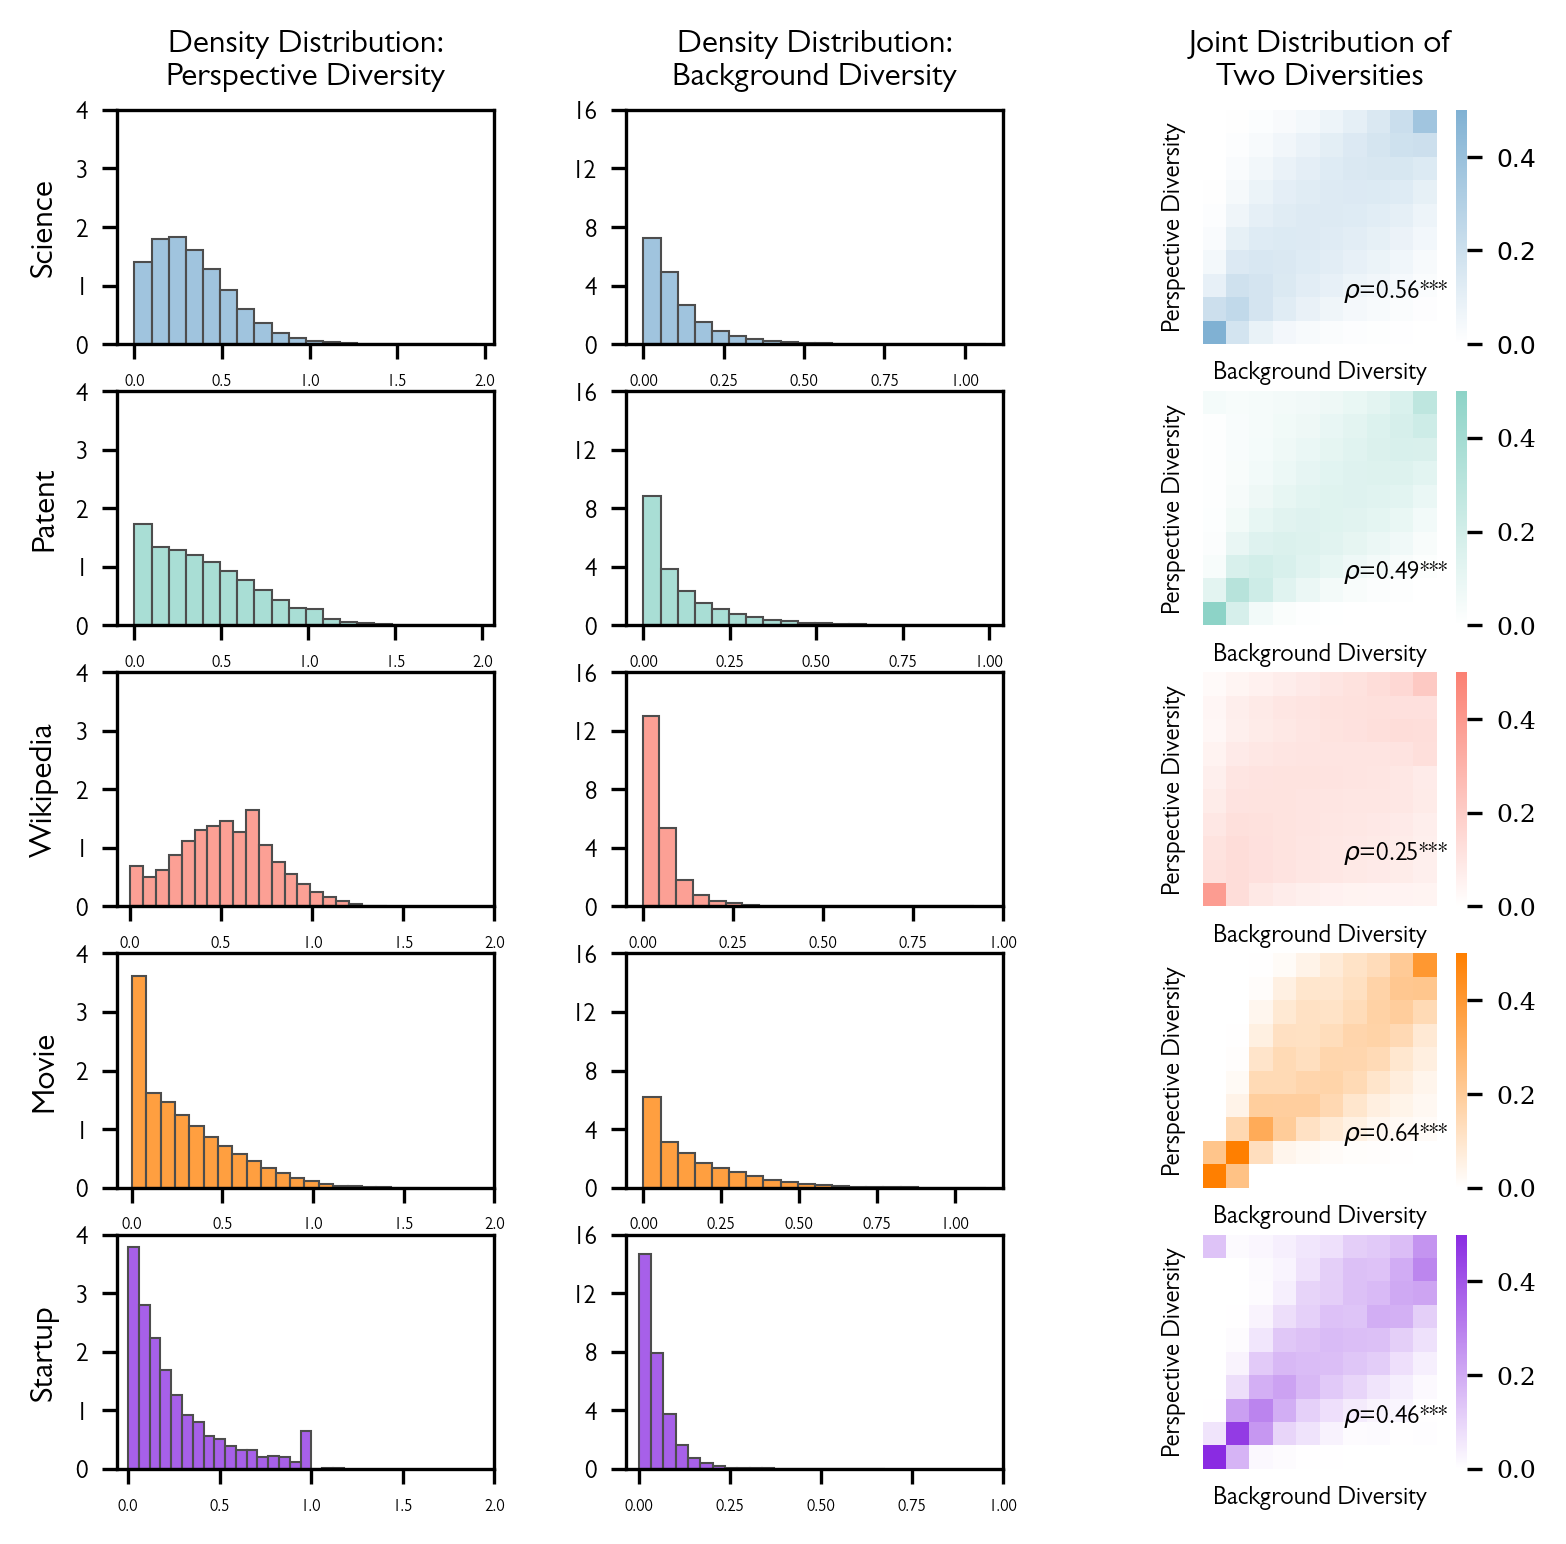

In [ ]:
plt.figure(figsize=(6,6),dpi=300)

seq=1
for title in ['science','patent','wikipedia','movie','startup']:
    group_num=5
    final_color=color_dict[title]
    if title=='wikipedia':
        target_df=df_dict[title]
        target_df=target_df[target_df['team_size']>2]
    else:
        target_df=df_dict[title]

    plt.subplot(5,3,seq)
    density = stats.gaussian_kde([x for x in target_df['perspective_diversity1'] if str(x)!='nan'])
    x = np.linspace(0,2, 20)
    y = density(x)
    max_int=round(np.max(y))
    sns.histplot(data=target_df,x='perspective_diversity1',bins=20,color=final_color,edgecolor=".3",linewidth=.5,stat="density")
    plt.xticks([0,0.5,1,1.5,2],fontproperties=font,size=4)
    plt.yticks([0,1,2,3,4],fontproperties=font,size=6)
    plt.xlabel('')
    plt.ylabel('')
    if seq==1:
        plt.title('Density Distribution:\nPerspective Diversity',fontproperties=font,size=8)
    else:
        pass
    plt.ylabel(f'{title.capitalize()}',fontproperties=font,size=8)
    seq+=1

    plt.subplot(5,3,seq)
    density = stats.gaussian_kde(target_df['bdiversity'])
    x = np.linspace(0,1, 20)
    y = density(x)
    max_int=round(np.max(y))+1
    sns.histplot(data=target_df,x='bdiversity',bins=20,color=final_color,edgecolor=".3",linewidth=.5,stat="density")
    plt.xticks([0,0.25,0.5,0.75,1],fontproperties=font,size=4)
    plt.yticks([0,4,8,12,16],fontproperties=font,size=6)
    plt.xlabel('')
    plt.ylabel('')
    if seq==2:
        plt.title('Density Distribution:\nBackground Diversity',fontproperties=font,size=8)
    else:
        pass
    seq+=1

    plt.subplot(5,3,seq)
    color_list = ['white', final_color]
    target_cmap = mcolors.LinearSegmentedColormap.from_list("", color_list)

    target_df['pg']=pd.qcut(target_df['perspective_diversity1'],10,labels=False)
    target_df['bg']=pd.qcut(target_df['bdiversity'],10,labels=False)

    heat=pd.DataFrame(target_df.groupby(['pg','bg'])['team_size'].count())
    heat.reset_index(inplace=True)
    heat=heat.T
    heat.drop_duplicates(inplace=True)
    heat=heat.T
    heat=heat.pivot(index='pg',columns='bg',values='team_size')
    heat.fillna(0,inplace=True)
    all_count=heat.sum()
    heat=heat/all_count
    ax=sns.heatmap(heat,cmap=target_cmap,square=True,vmin=0,vmax=0.5)
    ax.invert_yaxis()
    cbar = ax.collections[0].colorbar
    cbar.set_label('', fontsize=12, fontweight='bold')
    cbar.ax.tick_params(labelsize=6)
    plt.rcParams.update({'font.size': 6, 'font.family': 'serif'})
    plt.yticks([])
    plt.xticks([])
    plt.ylabel('Perspective Diversity',fontproperties=font,size=6)
    plt.xlabel('Background Diversity',fontproperties=font,size=6)

    corr_df=target_df[['perspective_diversity1','bdiversity']]
    corr_df.dropna(inplace=True)
    correlation=pearsonr(corr_df['perspective_diversity1'],corr_df['bdiversity'])
    corr=correlation[0]
    p=correlation[1]
    if p<0.001:
        sign='***'
    elif p<0.01:
        sign='**'
    elif p<0.05:
        sign='*'
    else:
        sign=''
    str_=f'{round(corr,2)}'
    plt.text(6,2,r"$\rho$="+str_+sign,fontproperties=font,size=6)
    if seq==3:
        plt.title('Joint Distribution of\nTwo Diversities',fontproperties=font,size=8)
    else:
        pass
    seq+=1
plt.subplots_adjust(wspace=0.35,hspace=0.2)
# plt.savefig('/project/jevans/likun/cognitive_project_visualization/fig2/distribution_figure.pdf',bbox_tight='inches')

In [ ]:
font_small = fm.FontProperties(
       family = 'Gill Sans',
       fname = '/project/jevans/likun/Gill Sans.otf',
       size=8)

from copy import deepcopy

<ipython-input-30-73917304895f>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df.dropna(inplace=True)
<ipython-input-30-73917304895f>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df.dropna(inplace=True)
<ipython-input-30-73917304895f>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df.dropna(inplace=True)
<ipython-input-30-73917304895f>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

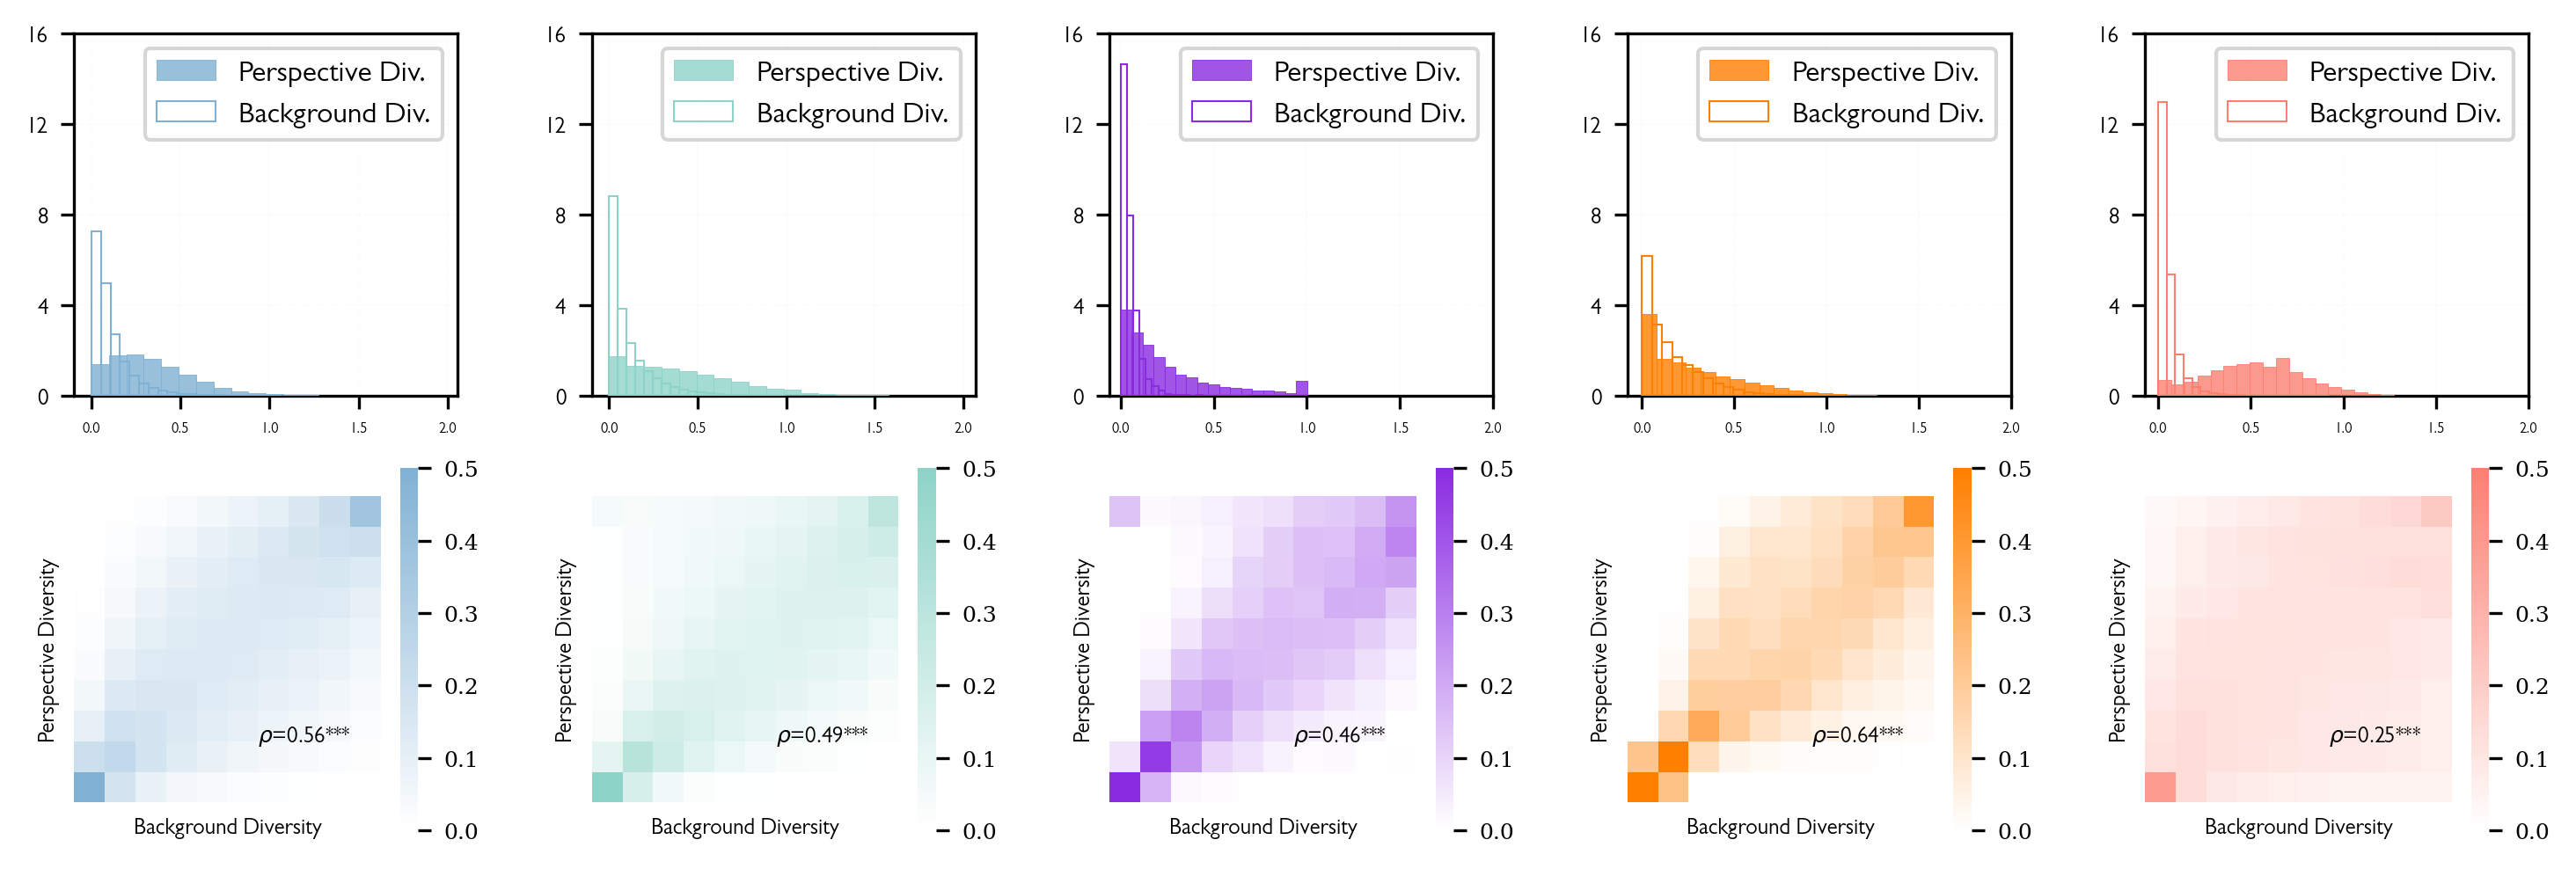

In [ ]:
plt.figure(figsize=(12,4),dpi=300)

seq=1
for title in ['science','patent','startup','movie','wikipedia']:
    group_num=5
    final_color=color_dict[title]
    if title=='wikipedia':
        target_df=deepcopy(df_dict[title])
        target_df=target_df[target_df['team_size']>2]
    else:
        target_df=deepcopy(df_dict[title])

    plt.subplot(2,5,seq)

    density = stats.gaussian_kde([x for x in target_df['perspective_diversity1'] if str(x)!='nan'])
    x = np.linspace(0,1, 20)
    y = density(x)
    max_int=round(np.max(y))+1
    sns.histplot(data=target_df,x='perspective_diversity1',bins=20,color=final_color,edgecolor=final_color,linewidth=.2,stat="density",alpha=0.8,zorder=20,label='Perspective Div.')

    density = stats.gaussian_kde([x for x in target_df['bdiversity'] if str(x)!='nan'])
    x = np.linspace(0,2, 20)
    y = density(x)
    max_int=round(np.max(y))
    sns.histplot(data=target_df,x='bdiversity',bins=20,color='white',edgecolor=final_color,linewidth=0.5,stat="density",alpha=0.2,zorder=10,label='Background Div.')

    plt.xticks([0,0.5,1,1.5,2],fontproperties=font,size=4)
    plt.yticks([0,4,8,12,16],fontproperties=font,size=6)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(prop=font_small,fontsize=5)
    plt.grid('both',linewidth=0.05,linestyle='dotted',zorder=2,color='lightgrey')

    plt.subplot(2,5,seq+5)
    color_list = ['white', final_color]
    target_cmap = mcolors.LinearSegmentedColormap.from_list("", color_list)

    target_df['pg']=pd.qcut(target_df['perspective_diversity1'],10,labels=False)
    target_df['bg']=pd.qcut(target_df['bdiversity'],10,labels=False)

    heat=pd.DataFrame(target_df.groupby(['pg','bg'])['team_size'].count())
    heat.reset_index(inplace=True)
    heat=heat.T
    heat.drop_duplicates(inplace=True)
    heat=heat.T
    heat=heat.pivot(index='pg',columns='bg',values='team_size')
    heat.fillna(0,inplace=True)
    all_count=heat.sum()
    heat=heat/all_count
    ax=sns.heatmap(heat,cmap=target_cmap,square=True,vmin=0,vmax=0.5)
    ax.invert_yaxis()
    cbar = ax.collections[0].colorbar
    cbar.set_label('', fontsize=12, fontweight='bold')
    cbar.ax.tick_params(labelsize=6)
    plt.rcParams.update({'font.size': 6, 'font.family': 'serif'})
    plt.yticks([])
    plt.xticks([])
    plt.ylabel('Perspective Diversity',fontproperties=font,size=6)
    plt.xlabel('Background Diversity',fontproperties=font,size=6)

    corr_df=target_df[['perspective_diversity1','bdiversity']]
    corr_df.dropna(inplace=True)
    correlation=pearsonr(corr_df['perspective_diversity1'],corr_df['bdiversity'])
    corr=correlation[0]
    p=correlation[1]
    if p<0.001:
        sign='***'
    elif p<0.01:
        sign='**'
    elif p<0.05:
        sign='*'
    else:
        sign=''
    str_=f'{round(corr,2)}'
    plt.text(6,2,r"$\rho$="+str_+sign,fontproperties=font,size=6)

    seq+=1

plt.subplots_adjust(wspace=0.35,hspace=0.2)
plt.savefig('/project/jevans/likun/cognitive_project_visualization/fig2/distribution_figure_main.svg',bbox_inches='tight')

In [ ]:
#robust-by-team
df=pd.read_csv('/project/jevans/likun/cognitive_project_visualization/fig2/robust_by_team_size.csv')

In [ ]:
def clean_p(x):
    if '<' in x:
        v=int(x.split('<')[1].strip('(').strip(')'))
        return '$\mathit{P<e^{'+str(v)+'}}$'
    else:
        v=x.strip('=')
        return  '$\mathit{P={'+str(v)+'}}$'


df['p_pvalue']=df['p_pvalue'].apply(lambda x: clean_p(x))
df['b_pvalue']=df['b_pvalue'].apply(lambda x: clean_p(x))

In [ ]:
df

,case,team_size,pcoef,plower,pupper,p_pvalue,bcoef,blower,bupper,b_pvalue
0,science,2,0.271,0.133,0.409,$\mathit{P<e^{-3}}$,-1.152,-1.470,-0.833,$\mathit{P<e^{-12}}$
1,science,3,0.414,0.247,0.581,$\mathit{P<e^{-6}}$,-1.107,-1.496,-0.717,$\mathit{P<e^{-8}}$
2,science,4,0.540,0.308,0.772,$\mathit{P<e^{-6}}$,-1.125,-1.585,-0.664,$\mathit{P<e^{-6}}$
3,science,5,0.716,0.407,1.025,$\mathit{P<e^{-6}}$,-1.286,-1.863,-0.708,$\mathit{P<e^{-5}}$
4,patent,2,0.049,-0.017,0.116,$\mathit{P={0.144}}$,-0.738,-1.012,-0.465,$\mathit{P<e^{-7}}$
5,patent,3,0.038,-0.008,0.085,$\mathit{P={0.107}}$,-0.720,-0.942,-0.497,$\mathit{P<e^{-10}}$
6,patent,4,0.110,0.015,0.206,$\mathit{P={0.024}}$,-0.985,-1.289,-0.681,$\mathit{P<e^{-10}}$
7,patent,5,0.253,0.174,0.332,$\mathit{P<e^{-10}}$,-1.448,-1.829,-1.067,$\mathit{P<e^{-14}}$
8,startup,2,0.288,-0.025,0.600,$\mathit{P={0.071}}$,-0.720,-1.416,-0.024,$\mathit{P={0.043}}$
9,startup,3,0.371,0.212,0.530,$\mathit{P<e^{-6}}$,-1.709,-2.743,-0.675,$\mathit{P={0.001}}$


<ipython-input-47-4707ea3968ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part.sort_values('team_size',ascending=True,inplace=True)


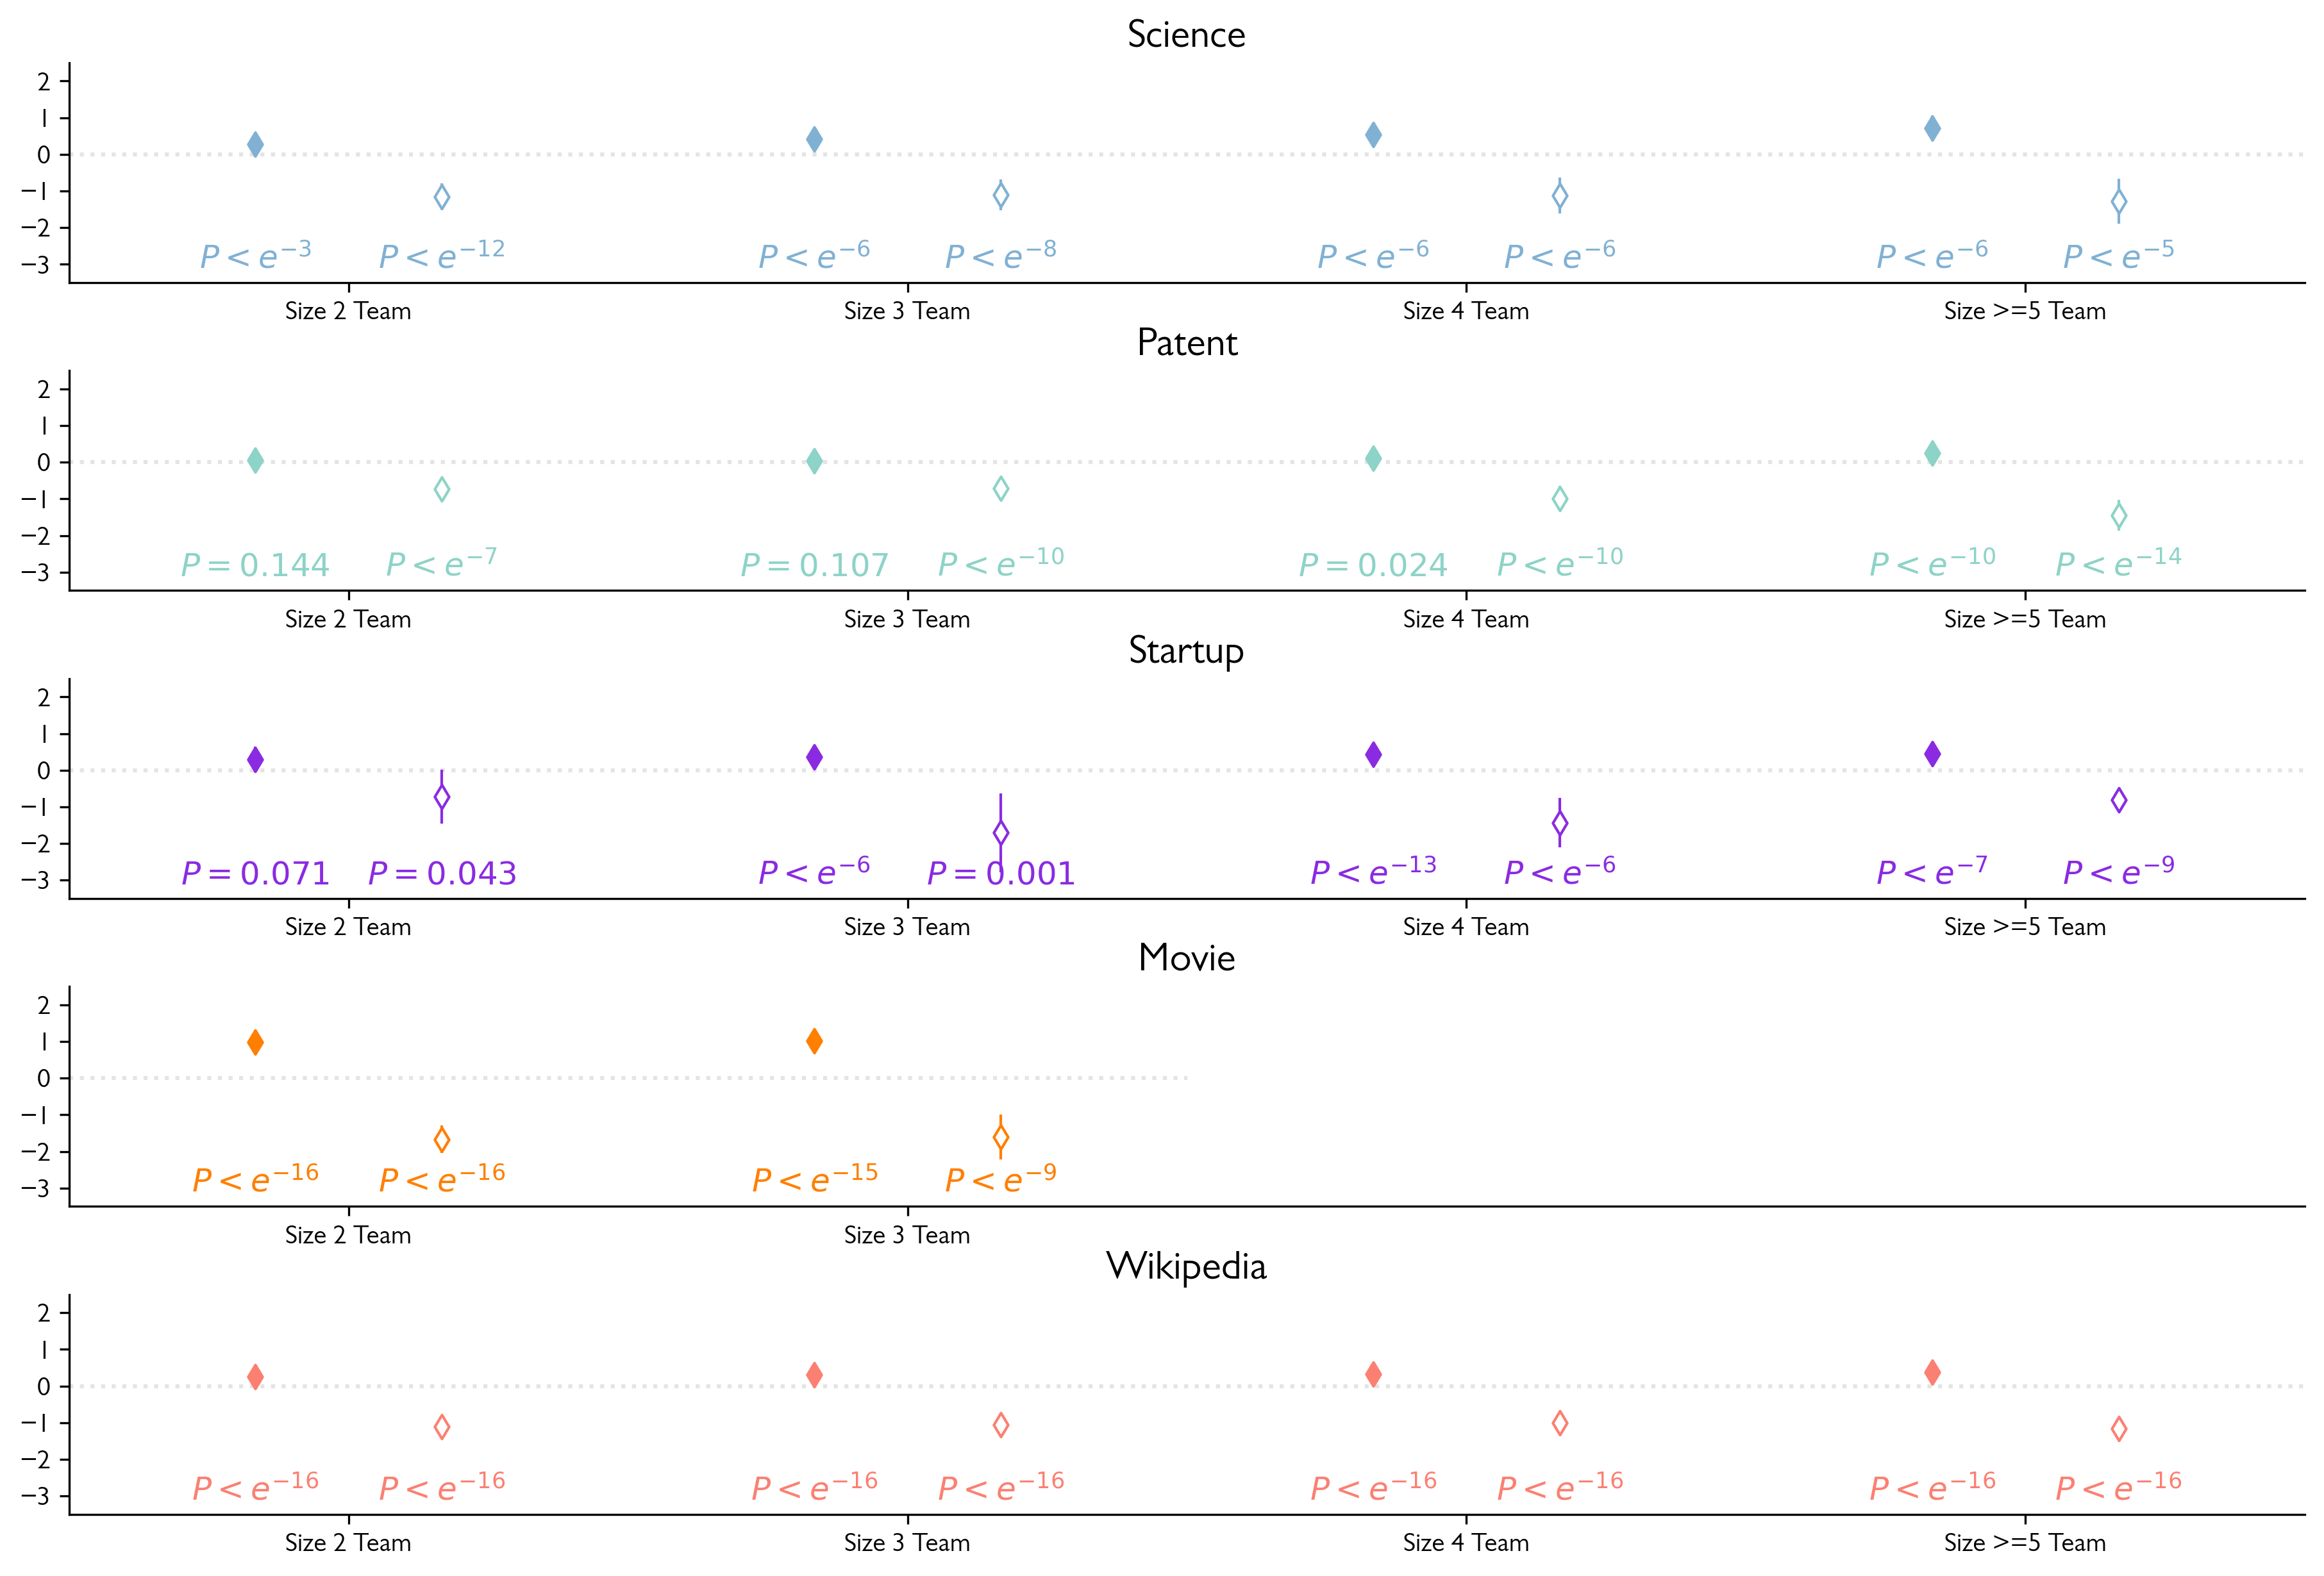

In [ ]:
plt.figure(figsize=(15,10),dpi=300)
seq=1
for case in ['science','patent','startup','movie','wikipedia']:
    part=df[df['case']==case]
    part.sort_values('team_size',ascending=True,inplace=True)
    plt.subplot(5,1,seq)
    if case!='movie':
        plt.scatter([1,4,7,10],part['pcoef'],marker='d',color=color_dict[case],s=40,zorder=50)
        plt.scatter([2,5,8,11],part['bcoef'],marker='d',edgecolor=color_dict[case],color='white',s=40,zorder=50)
    else:
        plt.scatter([1,4],part['pcoef'],marker='d',color=color_dict[case],s=40,zorder=50)
        plt.scatter([2,5],part['bcoef'],marker='d',edgecolor=color_dict[case],color='white',s=40,zorder=50)
    for index,row in part.iterrows():
        if row['team_size']==2:
            plt.plot([1,1],[row['plower'],row['pupper']],color=color_dict[case],zorder=5,linewidth=1)
            plt.plot([2,2],[row['blower'],row['bupper']],color=color_dict[case],zorder=5,linewidth=1)
        elif row['team_size']==3:
            plt.plot([4,4],[row['plower'],row['pupper']],color=color_dict[case],zorder=5,linewidth=1)
            plt.plot([5,5],[row['blower'],row['bupper']],color=color_dict[case],zorder=5,linewidth=1)
        elif row['team_size']==4:
            plt.plot([7,7],[row['plower'],row['pupper']],color=color_dict[case],zorder=5,linewidth=1)
            plt.plot([8,8],[row['blower'],row['bupper']],color=color_dict[case],zorder=5,linewidth=1)
        elif row['team_size']==5:
            plt.plot([10,10],[row['plower'],row['pupper']],color=color_dict[case],zorder=5,linewidth=1)
            plt.plot([11,11],[row['blower'],row['bupper']],color=color_dict[case],zorder=5,linewidth=1)
    if case!='movie':
        plt.plot([0,12],[0,0],linestyle='dotted',alpha=0.6,color='lightgrey')
        plt.ylim([-3.5,2.5])
        plt.xlim([0,12])
        plt.yticks([-3,-2,-1,0,1,2],fontproperties=font,size=10)
        plt.xticks([1.5,4.5,7.5,10.5],['Size 2 Team','Size 3 Team','Size 4 Team','Size >=5 Team'],fontproperties=font,size=10)
    else:
        plt.plot([0,6],[0,0],linestyle='dotted',alpha=0.6,color='lightgrey')
        plt.ylim([-3.5,2.5])
        plt.xlim([0,12])
        plt.yticks([-3,-2,-1,0,1,2],fontproperties=font,size=10)
        plt.xticks([1.5,4.5],['Size 2 Team','Size 3 Team'],fontproperties=font,size=10)
    plt.title(f'{case.capitalize()}',fontproperties=font,size=15)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    loc_array=[1,2,4,5,7,8,10,11]
    n=0
    for index, row in part.iterrows():
        plt.text(loc_array[n],-3.1, row['p_pvalue'],color=color_dict[case],size=12,fontproperties=font,horizontalalignment='center')
        n+=1
        plt.text(loc_array[n],-3.1, row['b_pvalue'],color=color_dict[case],size=12,fontproperties=font,horizontalalignment='center')
        n+=1

#     if case=='startup':
#         for i in [1,2,4,7,8,10,11]:
#             plt.text(i,1.5,'***',horizontalalignment='center',color=color_dict[case],size=20,fontproperties=font)
#         for i in [5]:
#             plt.text(i,1.5,'**',horizontalalignment='center',color=color_dict[case],size=20,fontproperties=font)
#     elif case=='patent':
#         for i in [2,5,8,10,11]:
#             plt.text(i,1.5,'***',horizontalalignment='center',color=color_dict[case],size=20,fontproperties=font)
#         for i in [7]:
#             plt.text(i,1.5,'*',horizontalalignment='center',color=color_dict[case],size=20,fontproperties=font)
#     elif case=='movie':
#         for i in [1,2,4,5]:
#             plt.text(i,1.5,'***',horizontalalignment='center',color=color_dict[case],size=20,fontproperties=font)
#     else:
#         for i in [1,2,4,5,7,8,10,11]:
#             plt.text(i,1.5,'***',horizontalalignment='center',color=color_dict[case],size=20,fontproperties=font)
    seq+=1
plt.subplots_adjust(hspace=0.4)
plt.savefig('/project/jevans/likun/cognitive_project_visualization/fig2/team_size_robust.png',bbox_inches='tight')